**Pymaceuticals Inc.**


**Analysis**

1)Effectiveness of Capomulin and Ramicane:

-Capomulin and Ramicane have the lowest mean tumor volumes (40.68 and 40.22, respectively), suggesting they might be the most effective in reducing tumor size among the drug regimens tested.

-They also have the lowest standard deviations (4.99 for Capomulin and 4.85 for Ramicane), indicating more consistent results across different subjects.

2)High Variability in Ketapril and Naftisol:

-Ketapril and Naftisol show the highest variances (68.55 and 66.17, respectively) and standard deviations (8.28 and 8.13, respectively), indicating a high degree of variability in their effectiveness.

-This suggests that their effects on tumor size are less predictable compared to other regimens.

3)Placebo Effect:

-The Placebo group has a mean tumor volume of 54.03, which is higher than the means for Capomulin and Ramicane but similar to other drug regimens like Naftisol and Stelasyn.

-This indicates that some of the drug regimens might not be significantly more effective than the placebo in reducing tumor size.


In [288]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = '../Desktop/Data_Science/Mod_5/Mouse_metadata.csv'
study_results_path = '../Desktop/Data_Science/Mod_5/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

#study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Reset the index
study_data_complete = study_data_complete.reset_index(drop=True)

# Display the data table for preview
study_data_complete.head()


# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [290]:
#Number of uniquq mice
num_mice = study_data_complete['Mouse ID'].nunique()

# Display the result
print(f'Number of unique mice: {num_mice}')


Number of unique mice: 249


In [292]:

# Find duplicates based on 'Mouse ID' and 'Timepoint'
duplicates = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display duplicates
print("\nDuplicate entries based on 'Mouse ID' and 'Timepoint':")
duplicates


Duplicate entries based on 'Mouse ID' and 'Timepoint':


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [294]:

# Create a clean DataFrame by dropping duplicate mice based on Mouse ID and Timepoint
clean_study_data = study_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Reset the index of the clean DataFrame
clean_study_data.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
clean_study_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [296]:
# Check the number of unique mice in the cleaned DataFrame
num_clean_mice = clean_study_data['Mouse ID'].nunique()

# Display the result
print(f'Number of unique mice in the clean DataFrame: {num_clean_mice}')


Number of unique mice in the clean DataFrame: 249


**Summary Statistics**

In [298]:
# Using groupby and summary statistical methods
grouped = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_stats_groupby = pd.DataFrame({
    'Mean Tumor Volume': grouped.mean(),
    'Median Tumor Volume': grouped.median(),
    'Variance Tumor Volume': grouped.var(),
    'Tumor Volume Std. Dev.': grouped.std(),
    'Tumor Volume Std. Err.': grouped.sem()
})

# Display the summary statistics DataFrame
print("Summary Statistics using groupby and summary statistical methods:")
summary_stats_groupby

Summary Statistics using groupby and summary statistical methods:


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [300]:
# Using the aggregation method
summary_stats_agg = clean_study_data.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std_dev=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)
print("\nSummary Statistics using the aggregation method:")
summary_stats_agg


Summary Statistics using the aggregation method:


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


**Bar & Pie Chart**

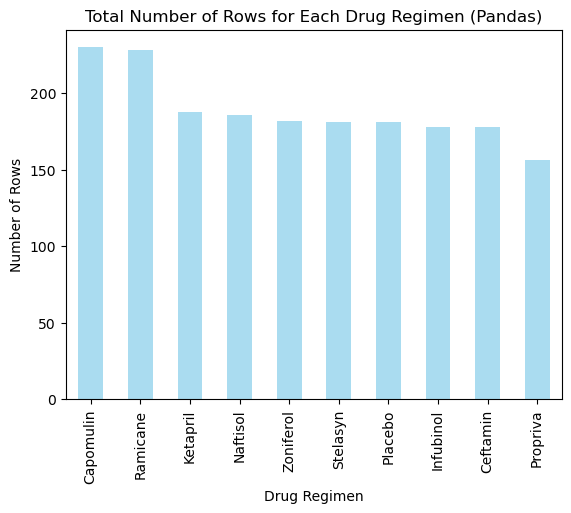

Using the Pandas method:


In [315]:
# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_study_data['Drug Regimen'].value_counts()

# Plot using Pandas
regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7)

plt.title('Total Number of Rows for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()
print("Using the Pandas method:")

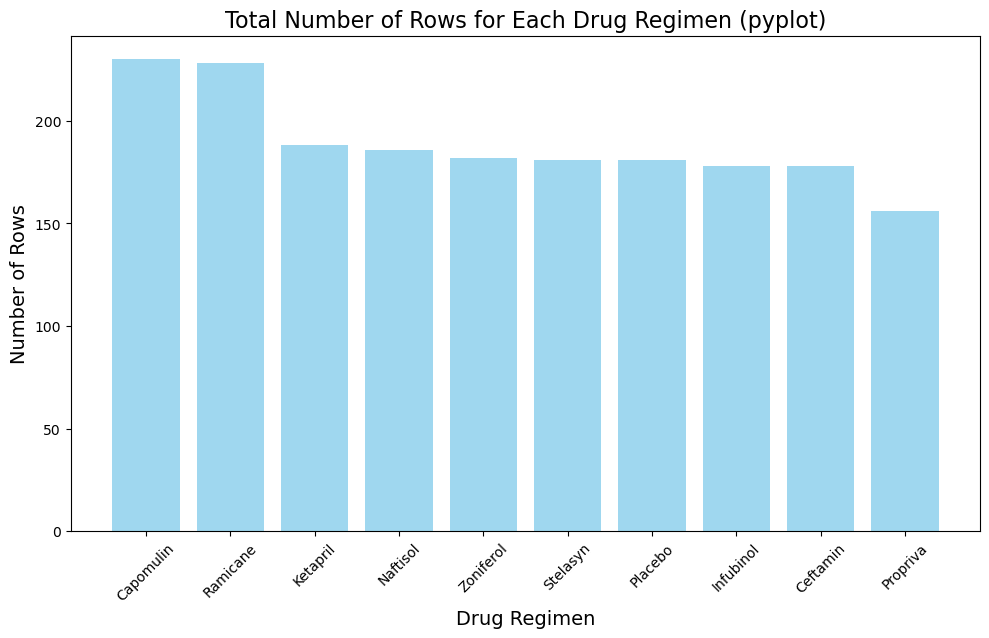

Using the Pyplot method:


In [317]:
# Plot using Matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', alpha=0.8)
plt.title('Total Number of Rows for Each Drug Regimen (pyplot)', fontsize= 16)
plt.xlabel('Drug Regimen',fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.tight_layout()  # Adjust layout to make room for labels
plt.xticks(rotation=45)
plt.show()
print("Using the Pyplot method:")



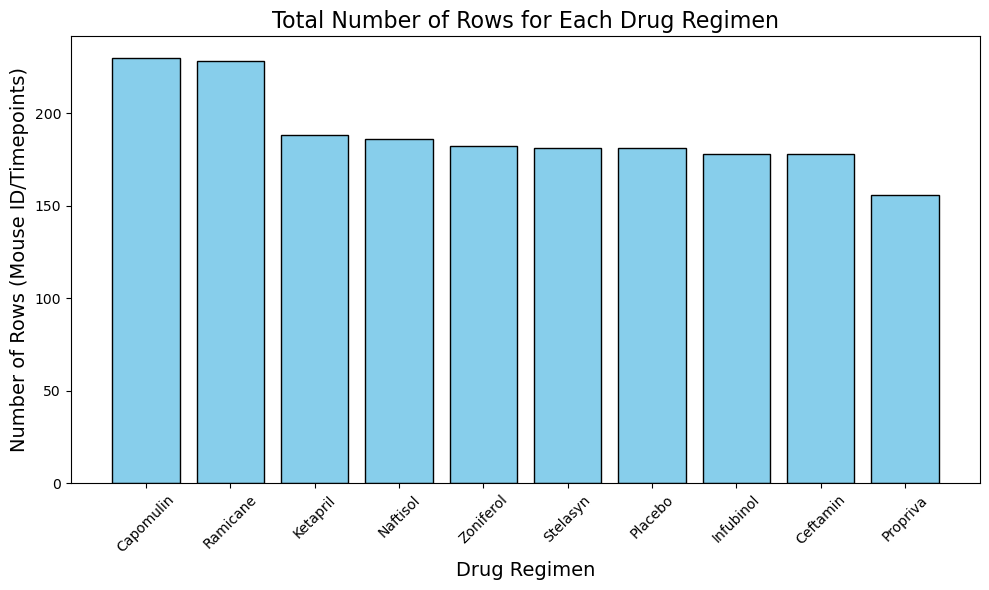

In [319]:
# Count the number of rows for each drug regimen
regimen_counts = clean_study_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Total Number of Rows for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


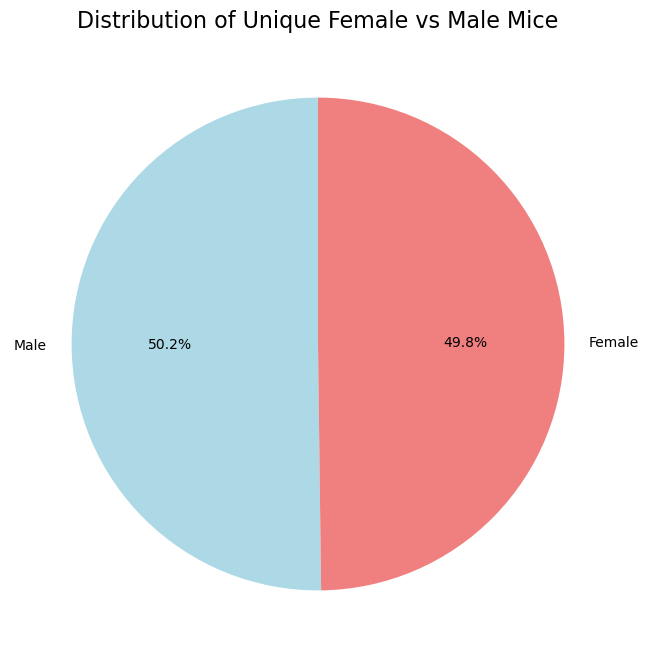

In [321]:
# Get unique mice with their gender
unique_mice = clean_study_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice by gender
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['lightblue', 'lightcoral'])

# Adding title
plt.title('Distribution of Unique Female vs Male Mice', fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()


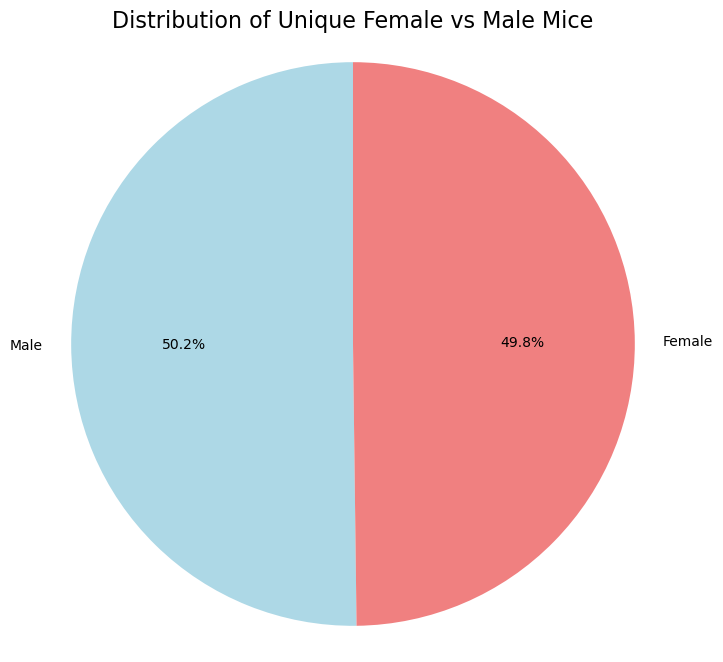

In [323]:
# Get unique mice with their gender
unique_mice = clean_study_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice by gender
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Adding title
plt.title('Distribution of Unique Female vs Male Mice', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


**Quartiles, Outliers and Boxplots**

In [325]:
# Get the last (greatest) timepoint for each mouse
last_timepoints = clean_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints_with_volume = pd.merge(last_timepoints, clean_study_data, on=['Mouse ID', 'Timepoint'])

# Filter for the specified treatment regimens
final_tumor_volumes = last_timepoints_with_volume[last_timepoints_with_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


# Create a DataFrame with the final tumor volumes
final_tumor_volumes_df = final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

# Display the DataFrame
final_tumor_volumes_df.head()

# Display the resulting DataFrame with final tumor volumes
#print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543


In [327]:
# List of treatments for later use
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment to calculate IQR and determine outliers
for treatment in treatments:
    # Locate the rows for the specific drug regimen
    tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list for plotting
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1  # Calculate the IQR
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Locate outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    #print(f'{treatment}:')
    #print(f'  IQR: {IQR}')
    #print(f'  Lower bound: {lower_bound}')
    #print(f'  Upper bound: {upper_bound}')
    print(f'  Potential outliers: {outliers.tolist()}\n')


  Potential outliers: []

  Potential outliers: []

  Potential outliers: [36.3213458]

  Potential outliers: []



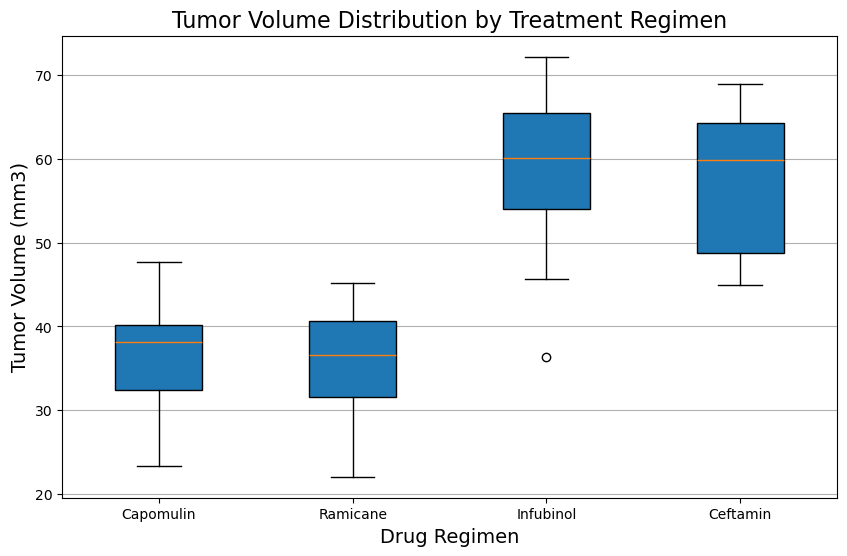

In [329]:
import matplotlib.pyplot as plt

# Create a DataFrame to hold the tumor volume data for each treatment group
tumor_vol_data = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

# Adding titles and labels
plt.title('Tumor Volume Distribution by Treatment Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.grid(axis='y')
plt.show()


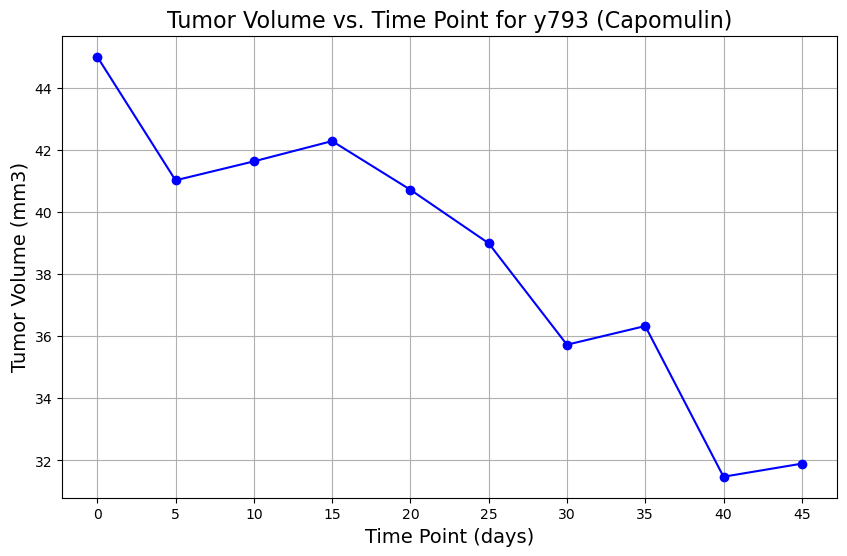

In [331]:
# Choose a specific mouse ID that was treated with Capomulin
mouse_id = 'y793'  # Replace with an actual Mouse ID from your dataset

# Filter the DataFrame for the selected mouse and Capomulin treatment
mouse_data = clean_study_data[(clean_study_data['Mouse ID'] == mouse_id) & 
                               (clean_study_data['Drug Regimen'] == 'Capomulin')]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Adding titles and labels
plt.title(f'Tumor Volume vs. Time Point for {mouse_id} (Capomulin)', fontsize=16)
plt.xlabel('Time Point (days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.xticks(mouse_data['Timepoint'])  # Show all time points
plt.grid()
plt.show()


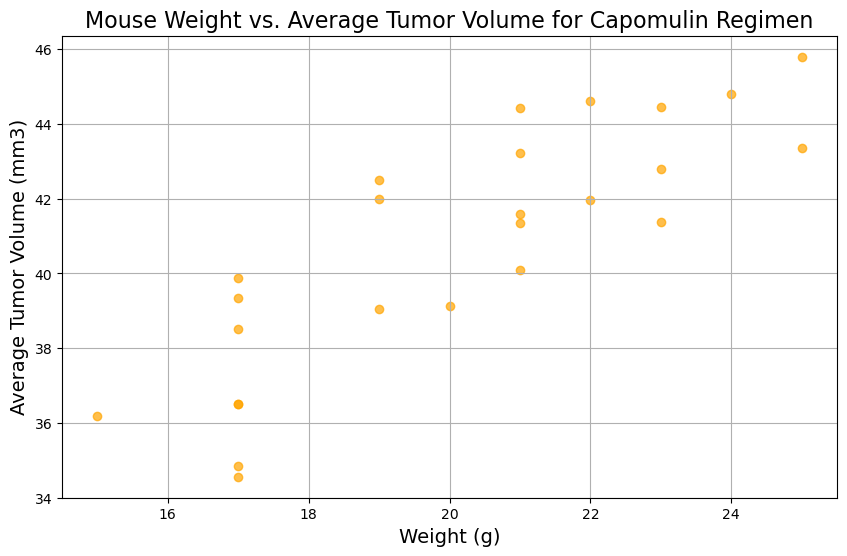

In [333]:
# Filter the DataFrame for the Capomulin regimen
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'first')  # Assuming weight is consistent for each mouse
).reset_index()

# Create a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight'], average_tumor_volume['Avg_Tumor_Volume'], color='orange', alpha=0.7)

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.grid()
plt.show()


Correlation coefficient: 0.841936342469472


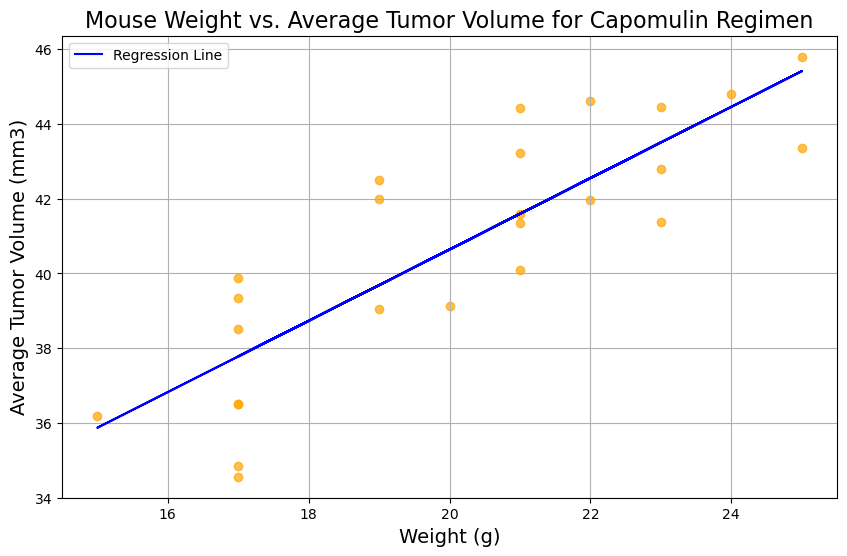

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


In [335]:
import numpy as np
import scipy.stats as st

# Calculate the correlation coefficient
correlation = st.pearsonr(average_tumor_volume['Weight'], average_tumor_volume['Avg_Tumor_Volume'])[0]
print(f'Correlation coefficient: {correlation}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight'], average_tumor_volume['Avg_Tumor_Volume'])

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight'], average_tumor_volume['Avg_Tumor_Volume'], color='orange', alpha=0.7)
plt.plot(average_tumor_volume['Weight'], intercept + slope * average_tumor_volume['Weight'], color='blue', label='Regression Line')

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Print the linear regression results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')
